# Creating better volcano plots 
trying to use ggplot2 to create volcano plots instead of EnhancedVolcano

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### phase 1 warm vs. control

In [73]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/unfiltered_lfc_p1wc.csv')
df <- filter(df, df$padj != 'NA')
head(df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111124802,160.73312,0.4591855,0.1880046,0.0000000,1.0000000,1
2,LOC111101273,55.04048,0.4055992,0.2258396,0.0000000,1.0000000,1
3,LOC111101250,77.79478,-0.6028040,0.2032051,-0.5059126,0.6129180,1
4,LOC111101262,188.90391,0.1674708,0.1795256,0.0000000,1.0000000,1
5,LOC111133260,32.36445,1.1528395,0.5237212,1.2465400,0.2125662,1
6,LOC111113503,13.84405,-0.3581280,0.4745894,0.0000000,1.0000000,1


In [74]:
# assigning the enriched pathway to a phase based on the enrichment score
df$more_me_in <- ifelse(df$log2FoldChange<0 & df$padj < 0.05, "control", #neg ES = pathway for control
                        ifelse(df$log2FoldChange>0 & df$padj < 0.05, "warm", # pos ES = pathway for warm
                               "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,more_me_in
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111124802,160.73312,0.4591855,0.1880046,0.0000000,1.0000000,1,neutral
2,LOC111101273,55.04048,0.4055992,0.2258396,0.0000000,1.0000000,1,neutral
3,LOC111101250,77.79478,-0.6028040,0.2032051,-0.5059126,0.6129180,1,neutral
4,LOC111101262,188.90391,0.1674708,0.1795256,0.0000000,1.0000000,1,neutral
5,LOC111133260,32.36445,1.1528395,0.5237212,1.2465400,0.2125662,1,neutral
6,LOC111113503,13.84405,-0.3581280,0.4745894,0.0000000,1.0000000,1,neutral


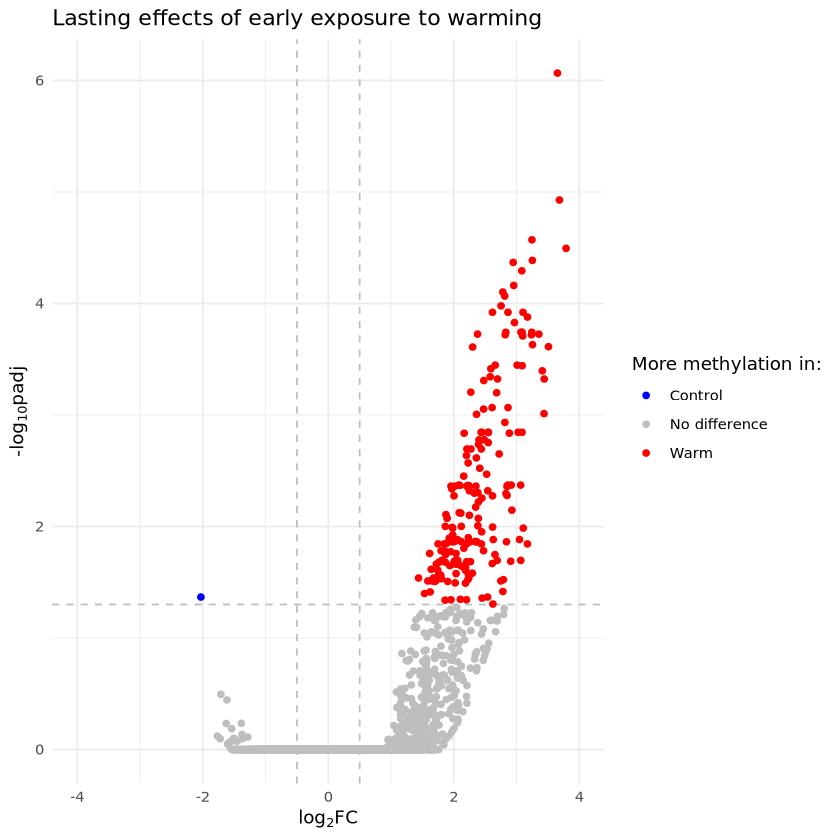

In [76]:
ggplot(data = df, aes(x = log2FoldChange, y = -log10(padj), col = more_me_in))+
geom_vline(xintercept = c(-0.5, 0.5), col = "gray", linetype = 'dashed') +
geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
geom_point() +
scale_color_manual(values = c('blue','gray', 'red'), labels = c("Control", "No difference", "Warm")) + 
theme_minimal() + 
labs(title = 'Lasting effects of early exposure to warming', col='More methylation in:', x = expression("log"[2]*"FC"), y = expression("-log"[10]*"padj")) +
scale_x_continuous(limits = c(-4,4))

trying to get a rid of that weird space between groups - wondering if there's a way to filter those genes out??

In [ ]:
df2 <- filter(df, df$log2FoldChange != 0 & df$padj != 0)

In [54]:
# assigning the enriched pathway to a phase based on the enrichment score
df2$more_me_in <- ifelse(df2$log2FoldChange<0 & df2$padj < 0.05, "control", #neg ES = pathway for control
                        ifelse(df2$log2FoldChange>0 & df2$padj < 0.05, "warm", # pos ES = pathway for warm
                               "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df2)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,more_me_in
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111124802,160.73312,0.4591855,0.1880046,0.0000000,1.0000000,1,neutral
2,LOC111101273,55.04048,0.4055992,0.2258396,0.0000000,1.0000000,1,neutral
3,LOC111101250,77.79478,-0.6028040,0.2032051,-0.5059126,0.6129180,1,neutral
4,LOC111101262,188.90391,0.1674708,0.1795256,0.0000000,1.0000000,1,neutral
5,LOC111133260,32.36445,1.1528395,0.5237212,1.2465400,0.2125662,1,neutral
6,LOC111113503,13.84405,-0.3581280,0.4745894,0.0000000,1.0000000,1,neutral


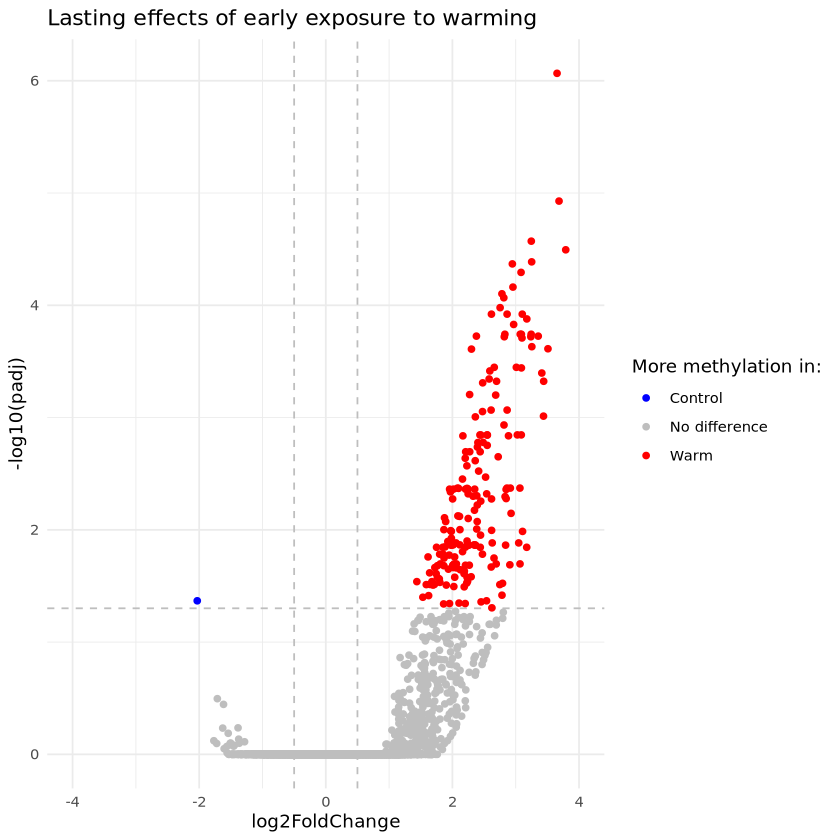

In [55]:
ggplot(data = df2, aes(x = log2FoldChange, y = -log10(padj), col = more_me_in))+
geom_vline(xintercept = c(-0.5, 0.5), col = "gray", linetype = 'dashed') +
geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
geom_point() +
scale_color_manual(values = c('blue','gray', 'red'), labels = c("Control", "No difference", "Warm")) + 
theme_minimal() + 
labs(title = 'Lasting effects of early exposure to warming', col='More methylation in:', x = expression("log"[2]*"FC"), y = expression("-log"[10]*"padj")) +
scale_x_continuous(limits = c(-4,4))

looks the exact same as above, so I'm not sure how to fix that problem

### phase 1 hypoxic, phase 2 hypoxic or control

In [64]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/lfc_sig_genes/unfiltered_lfc_p1h_hc.csv')
df <- filter(df, df$padj != 'NA')
head(df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111109452,3.338687,0.31180570,0.2956137,0.000000,1.000000e+00,1.0000000000
2,LOC111124802,316.608142,-0.07839417,0.1033729,0.000000,1.000000e+00,1.0000000000
3,LOC111101273,107.996235,-0.05650996,0.1242150,0.000000,1.000000e+00,1.0000000000
4,LOC111101250,171.639752,-0.04906065,0.1585186,0.000000,1.000000e+00,1.0000000000
5,LOC111101262,399.065246,-0.07049632,0.1311921,0.000000,1.000000e+00,1.0000000000
6,LOC111133260,30.078658,1.72346224,0.2533528,4.829086,1.371615e-06,0.0006876122


In [65]:
# assigning the enriched pathway to a phase based on the enrichment score
df$more_me_in <- ifelse(df$log2FoldChange<0 & df$padj < 0.05, "control", #neg ES = pathway for control
                        ifelse(df$log2FoldChange>0 & df$padj < 0.05, "hypoxic", # pos ES = pathway for warm
                               "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,more_me_in
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111109452,3.338687,0.31180570,0.2956137,0.000000,1.000000e+00,1.0000000000,neutral
2,LOC111124802,316.608142,-0.07839417,0.1033729,0.000000,1.000000e+00,1.0000000000,neutral
3,LOC111101273,107.996235,-0.05650996,0.1242150,0.000000,1.000000e+00,1.0000000000,neutral
4,LOC111101250,171.639752,-0.04906065,0.1585186,0.000000,1.000000e+00,1.0000000000,neutral
5,LOC111101262,399.065246,-0.07049632,0.1311921,0.000000,1.000000e+00,1.0000000000,neutral
6,LOC111133260,30.078658,1.72346224,0.2533528,4.829086,1.371615e-06,0.0006876122,hypoxic


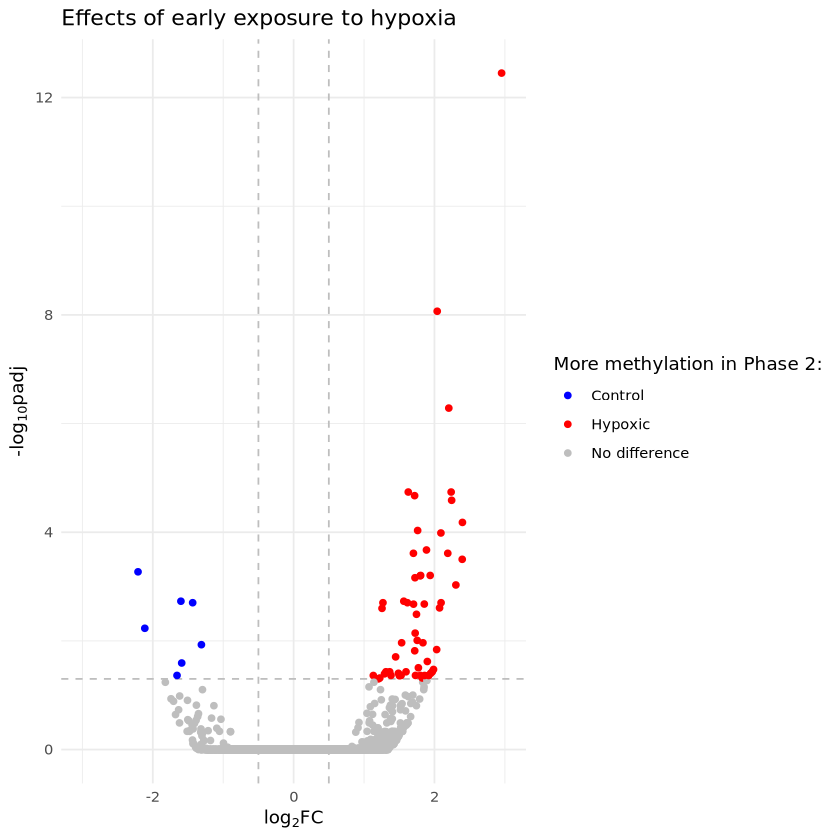

In [72]:
ggplot(data = df, aes(x = log2FoldChange, y = -log10(padj), col = more_me_in))+
geom_vline(xintercept = c(-0.5, 0.5), col = "gray", linetype = 'dashed') +
geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
geom_point() +
scale_color_manual(values = c('blue','red', 'gray'), labels = c("Control", "Hypoxic", "No difference")) + 
theme_minimal() + 
labs(title = 'Effects of early exposure to hypoxia', col='More methylation in Phase 2:', x = expression("log"[2]*"FC"), y = expression("-log"[10]*"padj")) +
scale_x_continuous(limits = c(-3,3))